In [47]:
import base64
import requests
import os
from PIL import Image
from mistralai import Mistral

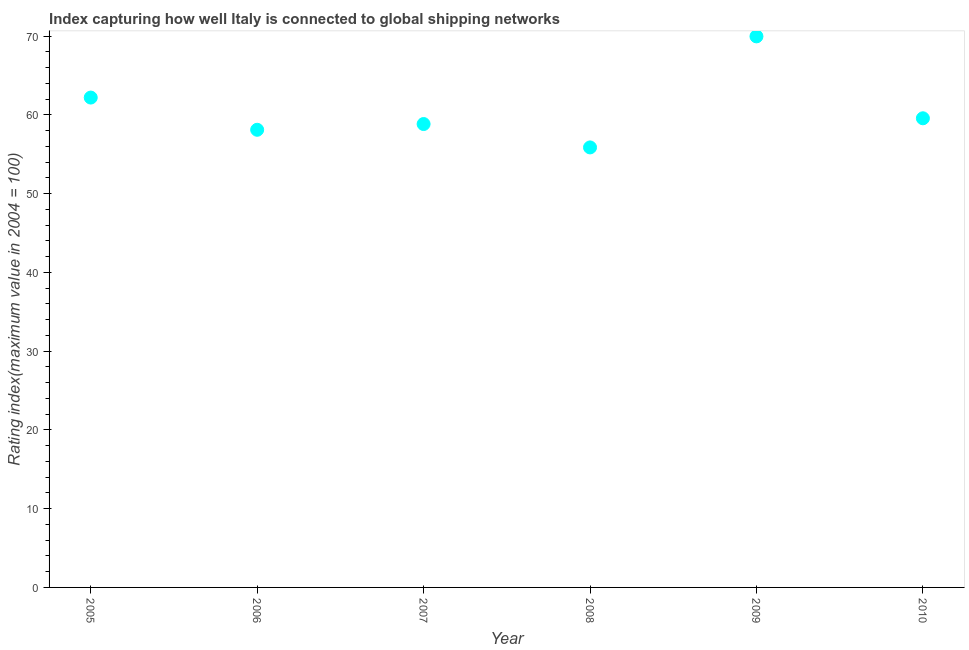

In [48]:
def encode_image(image_path):

    try:
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    except FileNotFoundError:
        print(f"Error: The file {image_path} was not found.")
        return None
    except Exception as e:  
        print(f"Error: {e}")
        return None

image_path = "images/plotqa/1.png"
base64_image = encode_image(image_path)

Image.open(image_path).convert('RGB')

In [51]:
api_key = "wZvsLgdJGNstGJVVSJLZPNT91Zcuvk10"
client = Mistral(api_key = api_key)

ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{base64_image}" 
    }
)

print(len(ocr_response.pages))
ocr_response

1


OCRResponse(pages=[OCRPageObject(index=0, markdown='![img-0.jpeg](img-0.jpeg)', images=[OCRImageObject(id='img-0.jpeg', top_left_x=0, top_left_y=0, bottom_right_x=968, bottom_right_y=650, image_base64=None)], dimensions=OCRPageDimensions(dpi=200, height=650, width=969))], model='mistral-ocr-2503-completion', usage_info=OCRUsageInfo(pages_processed=1, doc_size_bytes=30292))

In [50]:
print(ocr_response.pages[0].markdown)

![img-0.jpeg](img-0.jpeg)
